# Project Data Science Blog Post

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor


In [2]:
df = pd.read_csv("bfs_monthly.csv")

In [3]:
df.head()

,sa,naics_sector,series,geo,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,U,TOTAL,BA_BA,US,2025,497030,440230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,U,NAICS11,BA_BA,US,2025,5141,4258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,U,NAICS21,BA_BA,US,2025,547,472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,U,NAICS22,BA_BA,US,2025,689,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,U,NAICS23,BA_BA,US,2025,49525,44621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34732 entries, 0 to 34731
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sa            34732 non-null  object
 1   naics_sector  34732 non-null  object
 2   series        34732 non-null  object
 3   geo           34732 non-null  object
 4   year          34732 non-null  int64 
 5   jan           33060 non-null  object
 6   feb           33060 non-null  object
 7   mar           31844 non-null  object
 8   apr           31844 non-null  object
 9   may           31844 non-null  object
 10  jun           31844 non-null  object
 11  jul           33516 non-null  object
 12  aug           33516 non-null  object
 13  sep           33516 non-null  object
 14  oct           33516 non-null  object
 15  nov           33516 non-null  object
 16  dec           33516 non-null  object
dtypes: int64(1), object(16)
memory usage: 4.5+ MB


In [5]:
df.describe()

,year
count,34732.000000
mean,2013.984683
std,6.145463
min,2004.000000
25%,2009.000000
50%,2014.000000
75%,2019.000000
max,2025.000000


Concentrate on data for total business applications for all of US

In [6]:
mask = ((df['sa'] == 'U')
        & (df['naics_sector'] == 'TOTAL')
        & (df['series'] == 'BA_BA')
        & (df['geo'] == 'US'))
df_us_total = df[mask].copy()
df_us_total.drop(columns=['sa', 'naics_sector', 'series', 'geo'], inplace=True)

In [7]:
df_us_total

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2025,497030,440230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1216,2024,577568,458672,470784,443598,504575,401446,456420,388560,369528,458177,350656,321663
2432,2023,441031,464904,617545,457151,533041,435147,412423,523073,408249,404868,447547,316492
3648,2022,449058,449408,562756,445650,410045,472624,364903,469377,365683,368558,406473,295145
4864,2021,501488,460691,612420,511873,483476,516980,380849,382728,461557,365884,336174,375586
6308,2020,362175,323296,282548,301789,285507,349530,585048,432629,465818,349552,307973,310328
7980,2019,354756,319377,327882,299706,343408,270171,240092,325560,249652,315321,228572,224336
9652,2018,304316,305131,394145,291893,348422,276202,249185,329760,248809,242297,283342,213669
11324,2017,270066,277874,356418,267025,309372,249383,229436,300244,223018,231304,275026,192730
12996,2016,265430,257163,321951,249523,240226,252132,224371,276166,218218,208977,247635,186797


In [8]:
def get_time_series_dataframe(df, sa='U', naics_sector='TOTAL', series='BA_BA', geo='US'):
    """
    Function to get time series dataframe from tabulated dataset per month, filtered by sa, naics_sector, series and geo.

    :param df: Dataframe to unpivot
    :param sa: Use seasonally adjusted data or unadjusted data? default is 'U' (unadjusted)
    :param naics_sector: 2-digit NAICS Sector. Default is 'TOTAL' (All NAICS)
    :param series: Type of business application. Default is 'BA_BA' (All business Applications)
    :param geo: Geopraphic Region. Default is 'US' (United States)
    :return: Unpivoted dataframe sorted by date
    """
    # filter for different features
    mask = ((df['sa'] == sa)
            & (df['naics_sector'] == naics_sector)
            & (df['series'] == series)
            & (df['geo'] == geo))
    df = df[mask].copy()
    df.drop(columns=['sa', 'naics_sector', 'series', 'geo'], inplace=True)

    # unpivot dataframe
    df = pd.melt(df,
                 id_vars=['year'],
                 var_name='month',
                 value_vars=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                 value_name='business_applications'
                 )
    df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'],
                                     format='%Y-%b')
    df.sort_values(by='date', ascending=True, inplace=True)
    # rows containing nans have no more useful info
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)
    df['business_applications'] = df['business_applications'].astype(int)

    return df

In [9]:
df_us_total = get_time_series_dataframe(df)


In [10]:
df_us_total

,year,month,business_applications,date
0,2004,jul,166448,2004-07-01
1,2004,aug,171070,2004-08-01
2,2004,sep,162742,2004-09-01
3,2004,oct,207389,2004-10-01
4,2004,nov,176104,2004-11-01
...,...,...,...,...
243,2024,oct,458177,2024-10-01
244,2024,nov,350656,2024-11-01
245,2024,dec,321663,2024-12-01
246,2025,jan,497030,2025-01-01


In [11]:
df_us_total.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   248 non-null    int64         
 1   month                  248 non-null    object        
 2   business_applications  248 non-null    int64         
 3   date                   248 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.9+ KB


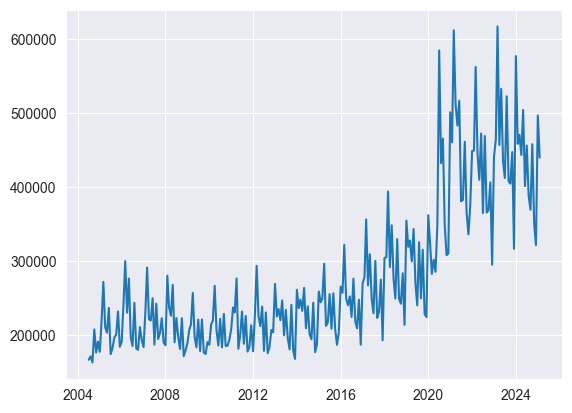

In [12]:
plt.plot(df_us_total['date'], df_us_total['business_applications'])
plt.show()

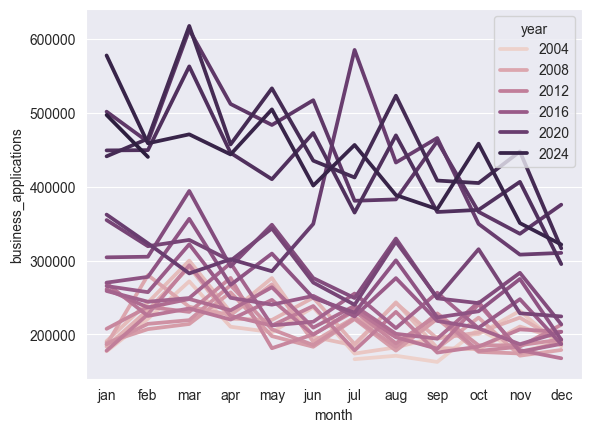

In [13]:
sns.pointplot(df_us_total, x='month', y='business_applications', hue='year',
              order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
              markersize=0,
              legend='auto',
              #legend_out=True
              )
plt.show()



In [14]:
df_us_total_adj = get_time_series_dataframe(df, sa='A')

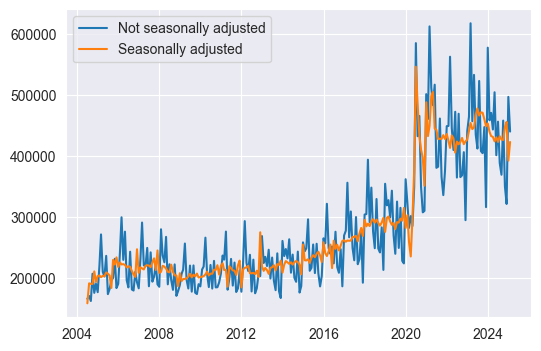

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(df_us_total['date'], df_us_total['business_applications'], label='Not seasonally adjusted')
ax.plot(df_us_total_adj['date'], df_us_total_adj['business_applications'], label='Seasonally adjusted')
plt.legend()
plt.show()

Group data per year

In [16]:
df_us_total_yearly = df_us_total.groupby(['year'], as_index=False).sum(numeric_only=True)
df_us_total_adj_yearly = df_us_total_adj.groupby(['year'], as_index=False).sum(numeric_only=True)

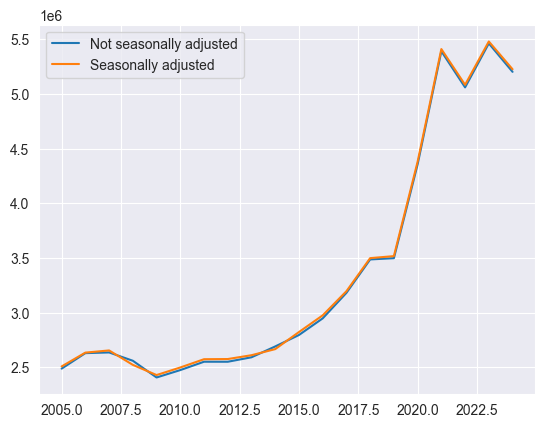

In [18]:
df_plot = df_us_total_yearly[(2005 <= df_us_total_yearly['year']) & (df_us_total_yearly['year'] <= 2024)].copy()
plt.plot(df_plot['year'], df_plot['business_applications'], label='Not seasonally adjusted')
df_plot = df_us_total_adj_yearly[(2005 <= df_us_total_adj_yearly['year']) & (df_us_total_adj_yearly['year'] <= 2024)].copy()
plt.plot(df_plot['year'], df_plot['business_applications'], label='Seasonally adjusted')
plt.legend()
plt.show()

#### Linear regression for Seasonally adjusted data

Since we have time-series data in a purely numerical format, regression seems to be an appropriate method to model the data.

In [35]:
# use index of dataframe for axis, as it gives range of months in the dataset to use for the regression
X = df_us_total_adj.index.values.reshape(-1, 1)
y = df_us_total_adj[['business_applications']]

lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

# The coefficients
print("Coefficients: \n", lr.coef_)
# The root mean squared error
print("Root mean squared error: %.2f" % root_mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

Coefficients: 
 [[1095.60926926]]
Root mean squared error: 49378.89
Coefficient of determination: 0.72


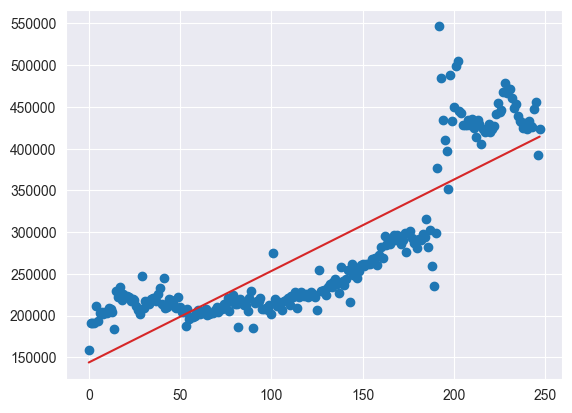

In [36]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='tab:red')

The scores for the linear regression model are not great. This is easily explained, as the data is clearly not linear and has a huge jump and volatility in the number of around the year 2020 (COVID19 pandemic). Because of this irregularity in the data, a decision tree might be better suited to model the data.

Tree depth: 2
Root mean squared error: 2e+04
Coefficient of determination: 0.95

Tree depth: 3
Root mean squared error: 1.7e+04
Coefficient of determination: 0.97

Tree depth: 4
Root mean squared error: 1.4e+04
Coefficient of determination: 0.98

Tree depth: 5
Root mean squared error: 1.2e+04
Coefficient of determination: 0.98



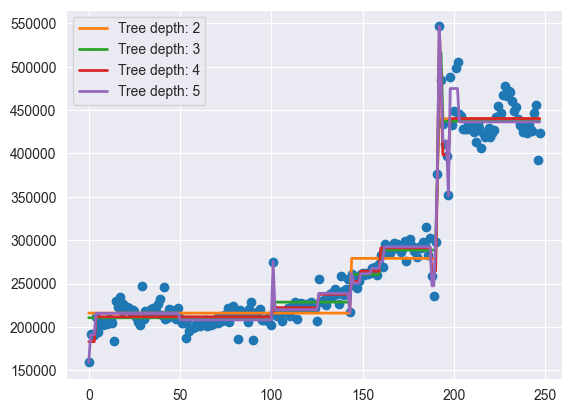

In [61]:
clf_1 = DecisionTreeRegressor(max_depth=2, random_state=42)
clf_2 = DecisionTreeRegressor(max_depth=3, random_state=42)
clf_3 = DecisionTreeRegressor(max_depth=4, random_state=42)
clf_4 = DecisionTreeRegressor(max_depth=5, random_state=42)

plt.scatter(X, y)
clfs = [clf_1, clf_2, clf_3, clf_4]
for ii, clf in enumerate(clfs):
    clf.fit(X, y)
    y_tree = clf.predict(X)
    depth = clf.get_depth()
    print(f"Tree depth: {depth}")
    print("Root mean squared error: {:.2}".format(root_mean_squared_error(y, y_tree)))
    print("Coefficient of determination: {:.2}\n".format(r2_score(y, y_tree)))

    plt.plot(X, y_tree, color=f"C{ii+1}", lw=2,
             label=f"Tree depth: {depth}")
plt.legend()
plt.show()

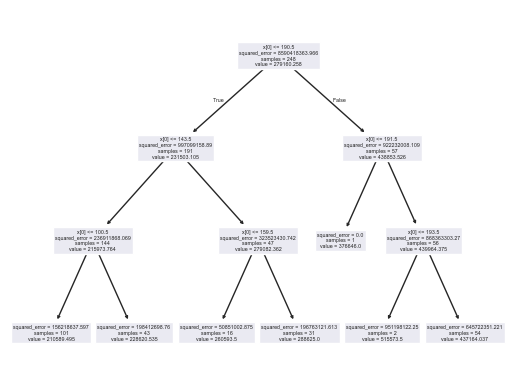

In [64]:
tree.plot_tree(clf_2)
plt.show()

Check for differences in pre-COVID and post-COVID predictions.
Since year 2020 was a anamoly, we leave it out of the analysis completely.

In [82]:
df_pre_covid = df_us_total_adj[(df_us_total['year'] < 2020)].copy()
df_post_covid = df_us_total_adj[(df_us_total['year'] > 2020)].copy()

Pre-covid

In [83]:
# use index of dataframe for axis, as it gives range of months in the dataset to use for the regression
X_pre = df_pre_covid.index.values.reshape(-1, 1)
y_pre = df_pre_covid[['business_applications']]

lr_pre = LinearRegression()
lr_pre.fit(X_pre, y_pre)
y_pre_pred = lr_pre.predict(X_pre)

# The coefficients
print("Coefficients: \n", lr_pre.coef_)
# The root mean squared error
print("Root mean squared error: %.2f" % root_mean_squared_error(y_pre, y_pre_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_pre, y_pre_pred))

Coefficients: 
 [[455.2618717]]
Root mean squared error: 18845.39
Coefficient of determination: 0.63


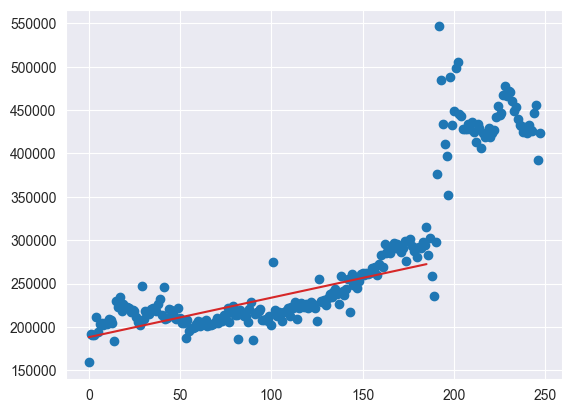

In [84]:
plt.scatter(X, y)
plt.plot(X_pre, y_pre_pred, color='tab:red')
plt.show()

In [85]:
# use index of dataframe for axis, as it gives range of months in the dataset to use for the regression
X_post = df_post_covid.index.values.reshape(-1, 1)
y_post = df_post_covid[['business_applications']]

lr_post = LinearRegression()
lr_post.fit(X_post, y_post)
y_post_pred = lr_post.predict(X_post)

# The coefficients
print("Coefficients: \n", lr_post.coef_)
# The root mean squared error
print("Root mean squared error: %.2f" % root_mean_squared_error(y_post, y_post_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_post, y_post_pred))

Coefficients: 
 [[-280.06343337]]
Root mean squared error: 21886.30
Coefficient of determination: 0.03


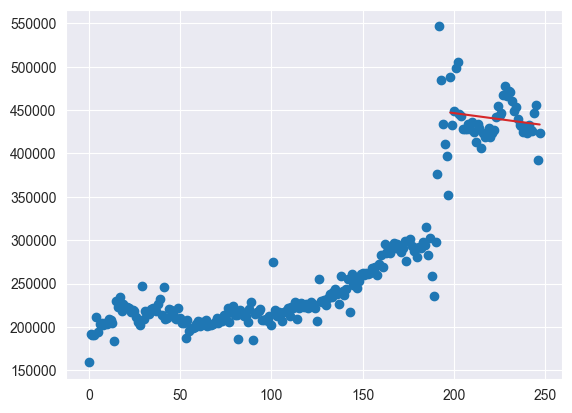

In [86]:
plt.scatter(X, y)
plt.plot(X_post, y_post_pred, color='tab:red')
plt.show()

Plot combined predictions from different models

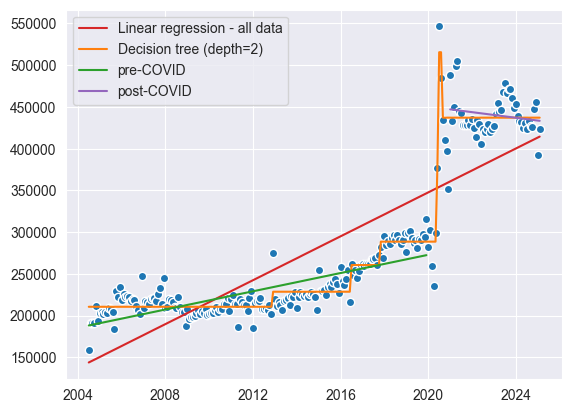

In [91]:
x_plot = df_us_total_adj['date']

plt.scatter(x_plot, df_us_total_adj['business_applications'], edgecolors='w', linewidths=1)
plt.plot(x_plot, y_pred, color='tab:red', label="Linear regression - all data")
plt.plot(x_plot, clf_2.predict(X), color='tab:orange', label="Decision tree (depth=2)")
plt.plot(df_us_total_adj['date'].iloc[X_pre.flatten()], y_pre_pred, color='tab:green', label="pre-COVID")
plt.plot(df_us_total_adj['date'].iloc[X_post.flatten()], y_post_pred, color='tab:purple', label="post-COVID")
plt.legend()
plt.show()